In [1]:
import pandas as pd
import datetime
import seaborn as sns
import numpy as np

# Not sure if this is just repeat and not important

In [2]:
fish_df = pd.read_csv('Created CSVs/Combined_Name_Corrected_All_Seins.csv')

In [4]:
fish_df.tail()

,Unnamed: 0,Date,Number Caught,Species
887,893,2017-09-17 00:00:00,2,shrimp
888,894,2017-10-07 00:00:00,TMTC,comb jelly
889,895,2017-10-07 00:00:00,14,asian shore crab
890,896,2017-10-07 00:00:00,4,sea snail
891,897,2017-10-07 00:00:00,9,sea snail


In [7]:
fish_df = fish_df.drop('Unnamed: 0', axis= 1)

In [8]:
fish_df['Date'] = pd.to_datetime(fish_df['Date'])

In [9]:
year_group =fish_df.groupby(fish_df['Date'].map(lambda x: x.year))

In [10]:
yearly_distinct_fish_count = {'year_2008':0, 'year_2009':0, 'year_2010':0,'year_2011':0, 'year_2012':0, 'year_2013':0, 'year_2014':0,
                              'year_2015':0,'year_2016':0, 'year_2017':0}

In [11]:
years = ['year_2008', 'year_2009', 'year_2010','year_2011', 'year_2012', 'year_2013', 'year_2014',
                              'year_2015','year_2016', 'year_2017']

In [12]:
yearly_fish_total = {}

In [20]:
curr_year = 2008
for i in range(10):
    str_year = 'year_'+str(curr_year)
    fish_amount = len(set(list(year_group.get_group(curr_year)['Species'])))
    fish_count = len(list(year_group.get_group(curr_year)['Species']))
    yearly_distinct_fish_count[str_year] = fish_amount
    yearly_fish_total[str_year] = fish_count
    curr_year += 1
                                   


In [21]:
import matplotlib.pyplot as plt

In [22]:
%matplotlib inline

In [23]:
fish_caught = []
fish_count = []
for year in years:
    fish_caught.append(yearly_distinct_fish_count[year])
    fish_count.append(yearly_fish_total[year])
    

In [24]:
fish_df.head()
num_caught_list = []
summed_df = fish_df[['Date','Number Caught']].dropna()
for val in list(summed_df['Number Caught']):
    num_caught_list.append(int('0'+filter(lambda x: x.isdigit(), val)))
    
#print num_caught_list
summed_df['Number Caught'] = num_caught_list

In [25]:
summed_df =summed_df[['Date', 'Number Caught']].groupby('Date').sum()

In [26]:
#summed_df

In [28]:
summed_df['Date'] = summed_df.index
year_group_sum = summed_df.groupby(summed_df['Date'].map(lambda x: x.year))

In [29]:
year_group_sum =  year_group_sum.sum()

In [30]:
year_group_sum['Date'] = ['2011','2012','2013','2014','2015','2016','2017']

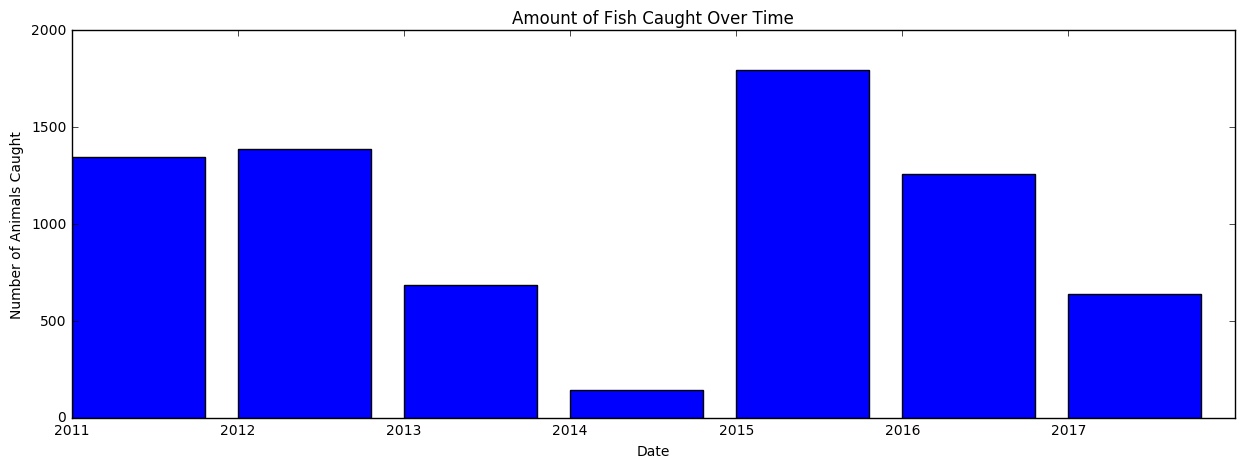

In [32]:
plt.figure(figsize=(15,5))
plt.bar( range(len(year_group_sum['Date'])),year_group_sum['Number Caught'])
plt.xticks(range(len(year_group_sum['Date'])), year_group_sum['Date'])
plt.ylim(0,2000)
plt.title('Amount of Fish Caught Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Animals Caught')

# Number of Species Caught

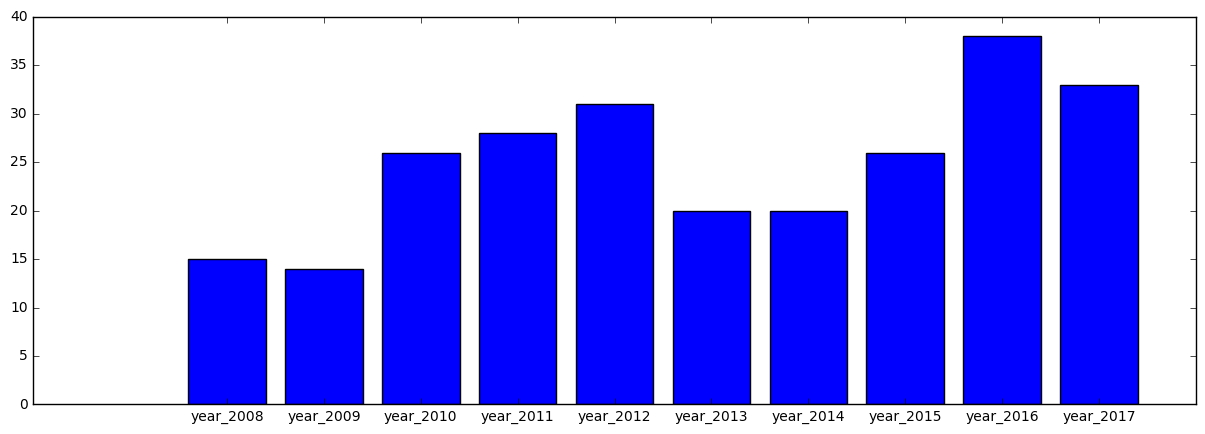

In [33]:
plt.figure(figsize=(15,5))
plt.bar(range(len(yearly_distinct_fish_count)), fish_caught, align='center')
plt.xticks(range(len(yearly_distinct_fish_count)), years)
#plt.subplots_adjust(left=0.0, right=1.0, top=1.0, bottom=0.1)
plt.show()

In [34]:
#plt.figure(figsize=(15,5))
#plt.bar(range(len(yearly_distinct_fish_count)), fish_count, align='center')
#plt.xticks(range(len(yearly_distinct_fish_count)), years)
#plt.subplots_adjust(left=0.0, right=1.0, top=1.0, bottom=0.1)
#plt.show()

In [39]:
fish = pd.read_csv('Created CSVs/Combined_Species_Count_By_Year.csv')

In [47]:
fish.tail()

,Species,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,Total Caught,Total Seasons,Unnamed: 13,Species.1,Total Caught.1
56,western mosquito fish,0,0,0,0,0,0,0,0,2,0,2,1,NaN,mole crab,1
57,white mullet,0,0,0,0,2,0,0,0,0,0,2,1,NaN,spotted whiff,1
58,white perch,0,0,0,1,0,0,0,4,0,0,5,2,NaN,sea squirt,1
59,wrasel sea bass,0,0,0,0,3,0,0,0,0,0,3,1,NaN,seaboard goby,1
60,Total Caught Per Year,17,16,123,1345,664,685,175,792,1560,914,6291,10,NaN,northern stargazer,1


In [48]:
y = list(fish.loc[60])[1:11]

In [49]:
x = range(2008,2018)

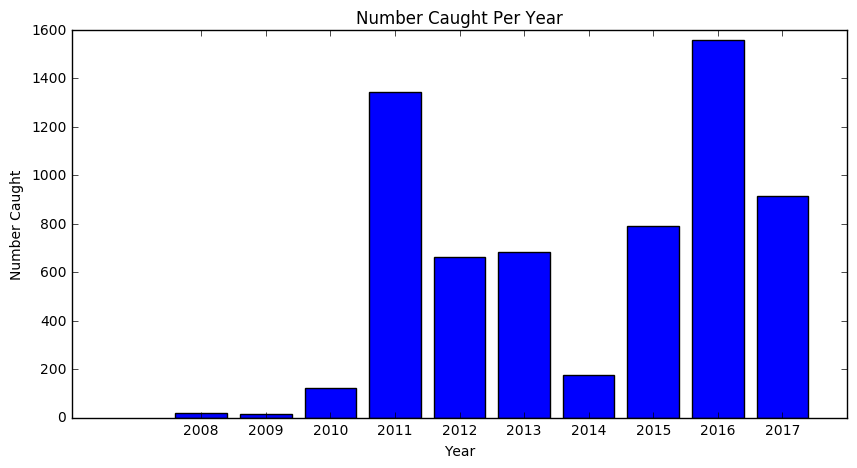

In [52]:
plt.figure(figsize=(10,5))
plt.bar(range(len(x)), y, align='center')
plt.xticks(range(len(x)), x)
plt.title('Number Caught Per Year')
plt.xlabel('Year')
plt.ylabel('Number Caught')

plt.show()

In [53]:
sns.set_style("whitegrid")

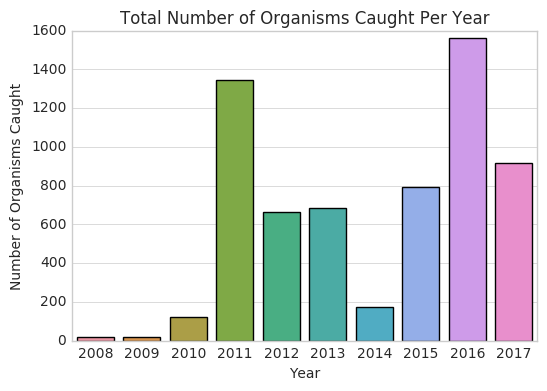

In [54]:
ax = sns.barplot(x,y)
ax.set(xlabel  = 'Year', ylabel ="Number of Organisms Caught", title = "Total Number of Organisms Caught Per Year")
fig = ax.get_figure()
fig.savefig('Number_Caught_Per_Year_Graph')

In [55]:
fish.tail()

,Species,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,Total Caught,Total Seasons,Unnamed: 13,Species.1,Total Caught.1
56,western mosquito fish,0,0,0,0,0,0,0,0,2,0,2,1,NaN,mole crab,1
57,white mullet,0,0,0,0,2,0,0,0,0,0,2,1,NaN,spotted whiff,1
58,white perch,0,0,0,1,0,0,0,4,0,0,5,2,NaN,sea squirt,1
59,wrasel sea bass,0,0,0,0,3,0,0,0,0,0,3,1,NaN,seaboard goby,1
60,Total Caught Per Year,17,16,123,1345,664,685,175,792,1560,914,6291,10,NaN,northern stargazer,1


In [58]:
species = pd.read_csv('Created CSVs/Species_Check_List_By_Year.csv')

In [59]:
species.tail()

,Unnamed: 0,Species,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
102,102,white mullet,No,No,No,No,Yes,No,No,No,No,No
103,103,white perch,No,No,No,Yes,No,No,No,Yes,No,No
104,104,windowpane flounder,No,No,No,No,No,No,Yes,No,Yes,No
105,105,winter flounder,Yes,No,Yes,No,No,No,Yes,Yes,Yes,Yes
106,106,wrasel sea bass,No,No,No,No,Yes,No,No,No,No,No


In [60]:
count = []

In [61]:
for year in range(2008,2018):
    counter = 0
    for val in list(fish[str(year)]):
        if val != 0:
    #for val in list(species[str(year)]):
        #if val == 'Yes':
            counter +=1
    count.append(counter)

In [62]:
count

[16, 15, 27, 29, 32, 21, 21, 27, 39, 34]

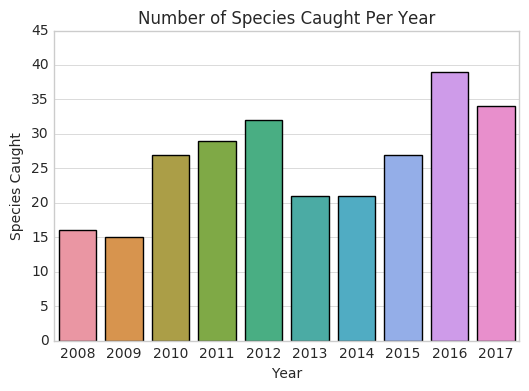

In [63]:
a = sns.barplot(range(2008,2018),count)
a.set(xlabel  = 'Year', ylabel ="Species Caught", title = "Number of Species Caught Per Year", ylim = [0,45])
fig = a.get_figure()
fig.savefig('Number_Species_Per_Year_Graph')